In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("test.csv")
df

,price,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,"$4,999",Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740480,gasoline,Island Gray,Black,used,146773,19 city / 29 hwy,sedan,4.0,PN21559B36,NaN,NaN,NaN
1,"$4,999",SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125960,gasoline,Redfire Clearcoat Metallic,Shale,used,91306,19 city / 26 hwy,sedan,4.0,27470B18,NaN,NaN,NaN
2,"$4,998",LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273404,gasoline,Clear White,Stone,used,173689,25 city / 34 hwy,sedan,4.0,D5717273A04,NaN,NaN,NaN
3,"$4,799",S,manual,1.6L 4 Cylinder Engine,FWD,3FADP4AJ7FM104573408,gasoline,Black,Smoke Storm,used,84802,NaN,sedan,4.0,FM10457320,NaN,NaN,NaN
4,"$3,980",GLI,automatic,2.0L 4 Cylinder Engine,FWD,3VWXJ71K86M764685595,gasoline,SHADOW BLUE,NaN,used,161510,22 city / 29 hwy,sedan,4.0,4070648,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,"$30,998",V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617193,gasoline,Black,BLACK,used,36568,16 city / 22 hwy,suv,4.0,2480683233,NaN,NaN,NaN
30300,"$30,998",Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795295,electric,White,GRAY,used,22361,104 city / 89 hwy,suv,4.0,2518100439,NaN,NaN,NaN
30301,"$26,998",Limited,automatic,2.0L,AWD,4S3GTAU63M3700402822,gasoline,Blue,TAN,used,11809,28 city / 36 hwy,wagon,4.0,2513365910,NaN,NaN,NaN
30302,"$48,998",RST,automatic,3.0L,4X4,3GCUYEET5MG330373550,diesel,White,BLACK,used,24875,22 city / 26 hwy,pickup,4.0,2498515078,crew,regular,single


In [5]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

df['price'] = pd.to_numeric(df['price'])

In [6]:
df = df.dropna(subset=['Trim'])

In [7]:
df = df.dropna(subset=['Transmission'])

for i in df['Transmission'].unique():
    print(i, end=': ')
    print(sum(df['Transmission'] == str(i)))

automatic: 29530
manual: 412


In [8]:
df = df.dropna(subset=['Engine'])

In [9]:
df = df.dropna(subset=['Drivetrain'])

for i in df['Drivetrain'].unique():
    print(i, end=': ')
    print(sum(df['Drivetrain'] == str(i)))

FWD: 12104
RWD: 4260
AWD: 6763
 2.2L: 3
4X4: 5895
4WD: 67
4X2: 52


In [11]:
df["Fuel Type"].fillna("gasoline", inplace = True)

In [12]:
df = df.dropna(subset=['Exterior Color'])
df = df.dropna(subset=['Interior Color'])


In [14]:
df = df.dropna(subset=['Gas Mileage'])

In [15]:
def str_to_num(x):
    res = []
    if type(x) == str:
        res = [int(i) for i in x.split() if i.isdigit()]
    else:
        return 0
    return res[0]/res[1]

df['Gas Mileage'] = df['Gas Mileage'].apply(str_to_num)

In [16]:
df = df.dropna(subset=['Body Style'])

Number of Missing Values in our data set



,Variable,Missing Values
0,price,0
1,Trim,0
2,Transmission,0
3,Engine,0
4,Drivetrain,0
5,VIN,0
6,Fuel Type,0
7,Exterior Color,0
8,Interior Color,0
9,Condition,0



 Percentage of Missing Values in our data set


,Count
price,0.000000
Trim,0.000000
Transmission,0.000000
Engine,0.000000
Drivetrain,0.000000
VIN,0.000000
Fuel Type,0.000000
Exterior Color,0.000000
Interior Color,0.000000
Condition,0.000000


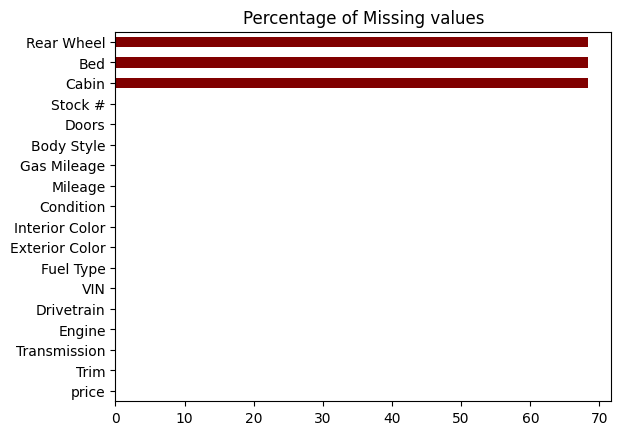

In [17]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values");

In [18]:
df["Cabin"].fillna("normal", inplace = True)

In [19]:
df["Bed"].fillna("no", inplace = True)

In [20]:
df["Rear Wheel"].fillna("normal", inplace = True)

In [21]:
col = 'Rear Wheel'
print(df[col].nunique())
print(df[col].isnull().sum())
df[col].unique()

2
0


array(['normal', 'single'], dtype=object)

In [22]:
df.head()

,price,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,4999,Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740480,gasoline,Island Gray,Black,used,146773,0.655172,sedan,4.0,PN21559B36,normal,no,normal
1,4999,SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125960,gasoline,Redfire Clearcoat Metallic,Shale,used,91306,0.730769,sedan,4.0,27470B18,normal,no,normal
2,4998,LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273404,gasoline,Clear White,Stone,used,173689,0.735294,sedan,4.0,D5717273A04,normal,no,normal
6,4999,Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231117,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,135101,0.692308,sedan,4.0,SK1691P20,normal,no,normal
7,4923,1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878239,gasoline,Blue Onyx Metallic,Charcoal,used,104749,0.789474,sedan,4.0,SK1690P91,normal,no,normal


Number of Missing Values in our data set



,Variable,Missing Values
0,price,0
1,Trim,0
2,Transmission,0
3,Engine,0
4,Drivetrain,0
5,VIN,0
6,Fuel Type,0
7,Exterior Color,0
8,Interior Color,0
9,Condition,0



 Percentage of Missing Values in our data set


,Count
price,0.000000
Trim,0.000000
Transmission,0.000000
Engine,0.000000
Drivetrain,0.000000
VIN,0.000000
Fuel Type,0.000000
Exterior Color,0.000000
Interior Color,0.000000
Condition,0.000000


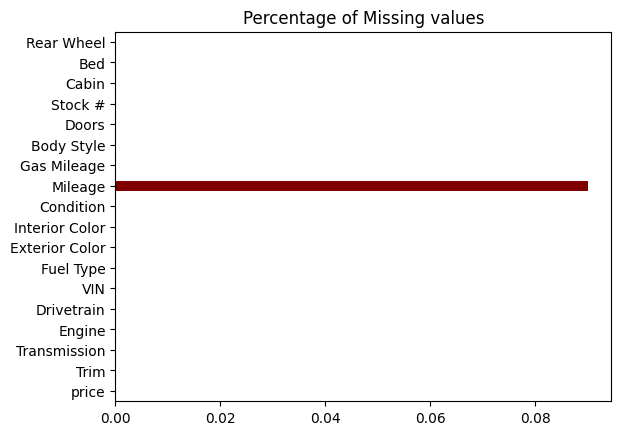

In [23]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values");

In [24]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,price,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,4999,Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740480,gasoline,Island Gray,Black,used,146773,0.655172,sedan,4.0,PN21559B36,normal,no,normal
1,4999,SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125960,gasoline,Redfire Clearcoat Metallic,Shale,used,91306,0.730769,sedan,4.0,27470B18,normal,no,normal
2,4998,LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273404,gasoline,Clear White,Stone,used,173689,0.735294,sedan,4.0,D5717273A04,normal,no,normal
3,4999,Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231117,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,135101,0.692308,sedan,4.0,SK1691P20,normal,no,normal
4,4923,1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878239,gasoline,Blue Onyx Metallic,Charcoal,used,104749,0.789474,sedan,4.0,SK1690P91,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18484,30998,V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617193,gasoline,Black,BLACK,used,36568,0.727273,suv,4.0,2480683233,normal,no,normal
18485,30998,Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795295,electric,White,GRAY,used,22361,1.168539,suv,4.0,2518100439,normal,no,normal
18486,26998,Limited,automatic,2.0L,AWD,4S3GTAU63M3700402822,gasoline,Blue,TAN,used,11809,0.777778,wagon,4.0,2513365910,normal,no,normal
18487,48998,RST,automatic,3.0L,4X4,3GCUYEET5MG330373550,diesel,White,BLACK,used,24875,0.846154,pickup,4.0,2498515078,crew,regular,single


In [25]:
df.drop_duplicates(inplace=True)
df.shape

(18489, 18)

In [26]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['Trim',
 'Transmission',
 'Engine',
 'Drivetrain',
 'VIN',
 'Fuel Type',
 'Exterior Color',
 'Interior Color',
 'Condition',
 'Mileage',
 'Body Style',
 'Stock #',
 'Cabin',
 'Bed',
 'Rear Wheel']

In [27]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print("Number of unique classes ",df[col].nunique())
    print('\n')

Trim
['Komfort' 'SEL' 'LX' 'Base' '1.6 SV' '2.5 S' 'LE' '1.6 S' 'E 320' 'SE'
 'GS' '2.0 SR' 'SXT' 'Sport' 'Touring' 'GLS' 'Eddie Bauer' 'EX' 'S'
 'Limited' 'LT' 'SL' 'LE 7-Passenger' 'LS' 'SLT-2' 'SLT-1' '3.5 SV'
 'LS Fleet' 'Touring-L' 'LX-P' '3.8L V6' 'LTZ' 'American Value Package'
 '3.5 SE' 'XLE' 'XLE 8-Passenger' 'XL' 'SE 2.0T' 'Big Horn'
 'Laramie Longhorn' 'SR' 'Work Truck' 'Raptor' 'XLT' 'Platinum'
 'PreRunner V6' 'High Altitude' 'Denali' 'TRD Sport' 'SR V6'
 '1794 Edition' 'SR5' 'SLT' 'SV' 'Warlock' 'LT Trail Boss' 'Custom'
 'SR5 V6' 'RTL' 'Elevation' 'Custom Trail Boss' 'Laramie' 'Express'
 'Rebel' 'Night' 'Desert Runner' 'Lariat' 'PRO-4X' 'Elevation Standard'
 'TRD Off-Road' 'King Ranch' 'Rubicon' 'Z71' 'TRD Pro HV' 'AT4' 'TRD Pro'
 'SLE' 'SEL Premium' 'Limited HV' 'High Country' 'RST' 'RTL-E' 'Pro'
 'Tremor' 'PRO-X' 'STX' '1794 Edition HV' 'ZR2' 'Tradesman' 'V6' 'RTL-T'
 'Black Edition' 'Grade' 'Trail Boss' 'Lone Star' 'Capstone HV'
 'Laramie Limited' 'PreRunner' 'LT Z71' 'S

In [28]:
columns_to_drop = ['VIN', 'Stock #', 'Trim']
df = df.drop(columns=columns_to_drop)
df

,price,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,automatic,I-4 cyl2.0L,FWD,gasoline,Island Gray,Black,used,146773,0.655172,sedan,4.0,normal,no,normal
1,4999,automatic,Duratec 3.0L V6 24V,FWD,gasoline,Redfire Clearcoat Metallic,Shale,used,91306,0.730769,sedan,4.0,normal,no,normal
2,4998,manual,2.0L 4 Cylinder Engine,FWD,gasoline,Clear White,Stone,used,173689,0.735294,sedan,4.0,normal,no,normal
3,4999,automatic,2.7L V6 MPI DOHC 24V,RWD,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,135101,0.692308,sedan,4.0,normal,no,normal
4,4923,automatic,1.6L I4 DOHC 16V,FWD,gasoline,Blue Onyx Metallic,Charcoal,used,104749,0.789474,sedan,4.0,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18484,30998,automatic,3.6L,AWD,gasoline,Black,BLACK,used,36568,0.727273,suv,4.0,normal,no,normal
18485,30998,automatic,0.0L,RWD,electric,White,GRAY,used,22361,1.168539,suv,4.0,normal,no,normal
18486,26998,automatic,2.0L,AWD,gasoline,Blue,TAN,used,11809,0.777778,wagon,4.0,normal,no,normal
18487,48998,automatic,3.0L,4X4,diesel,White,BLACK,used,24875,0.846154,pickup,4.0,crew,regular,single


In [29]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
    df[df[i]<0]
    print("Records with Negative values in %s : " %i,df[df[i]<0])
    print('\n')

Records with Negative values in price :  Empty DataFrame
Columns: [price, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []


Records with Negative values in Gas Mileage :  Empty DataFrame
Columns: [price, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []


Records with Negative values in Doors :  Empty DataFrame
Columns: [price, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []




In [31]:
df.corr().style.background_gradient("copper_r")

,price,Gas Mileage,Doors
price,1.000000,0.084243,0.071577
Gas Mileage,0.084243,1.000000,0.090300
Doors,0.071577,0.090300,1.000000


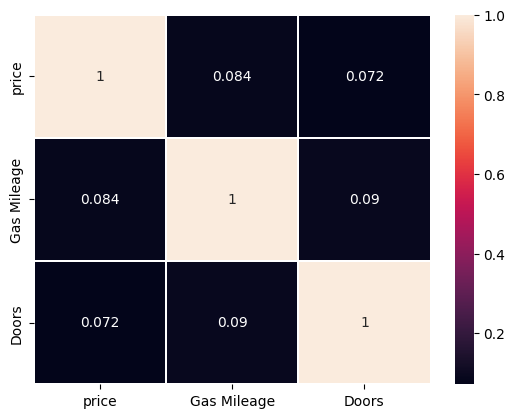

In [32]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

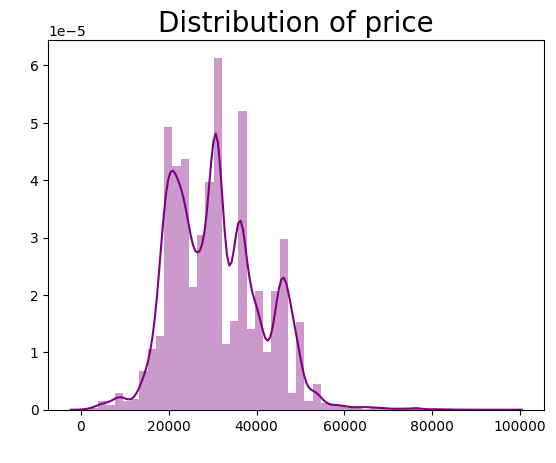

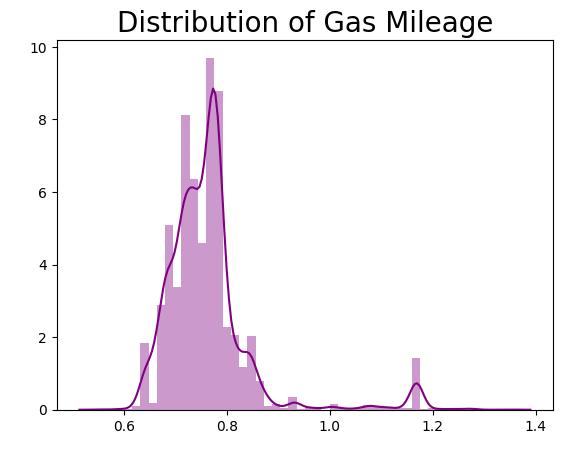

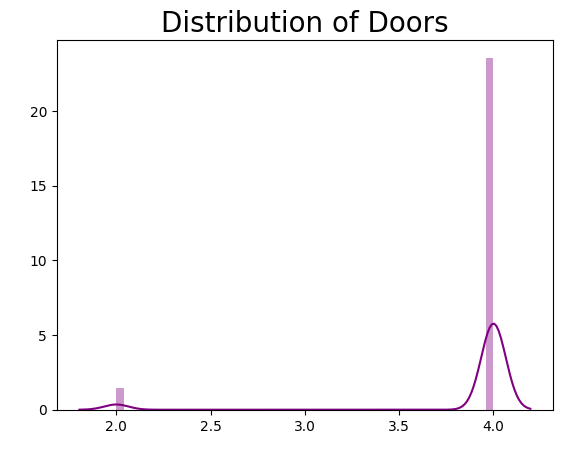

In [33]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:

    ax = sns.distplot(df[i], color = 'purple')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 10)
    plt.show();
    print('\n')

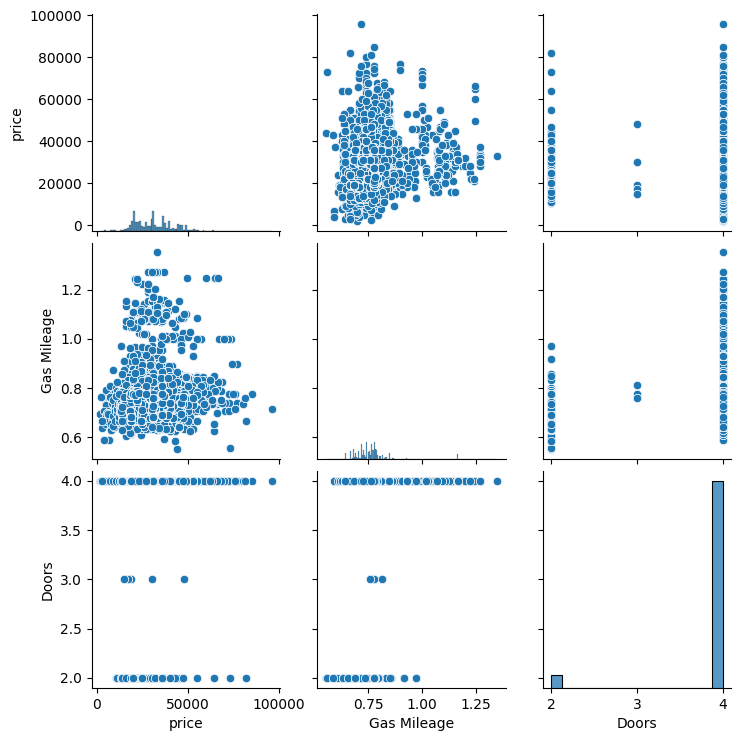

In [34]:
sns.pairplot(df)

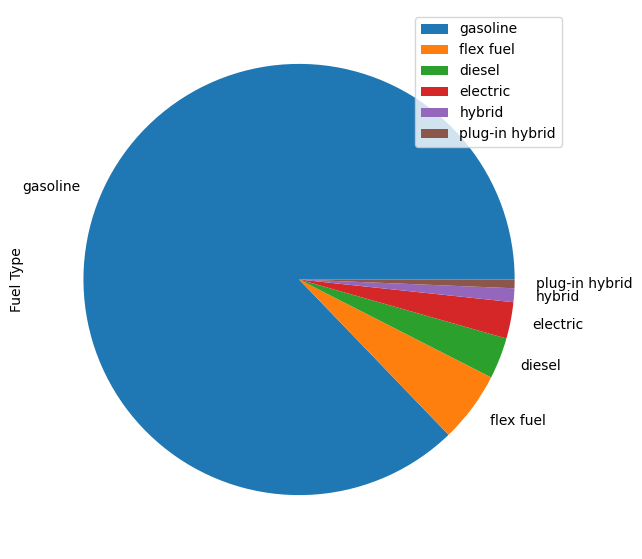

In [35]:
data=pd.DataFrame(df['Fuel Type'].value_counts())
plot = data.plot.pie(y='Fuel Type', figsize=(7, 7))

<Axes: xlabel='price', ylabel='Density'>

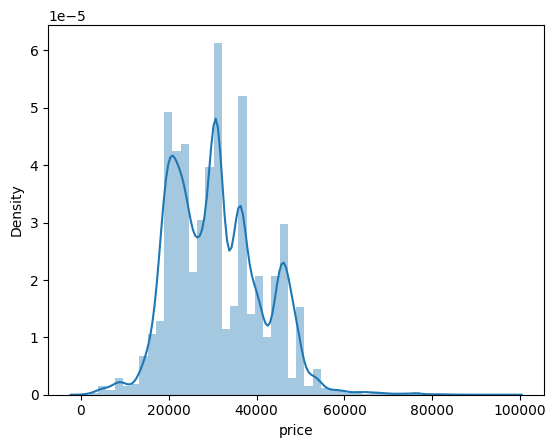

In [36]:
sns.distplot(df['price'],kde=True)

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

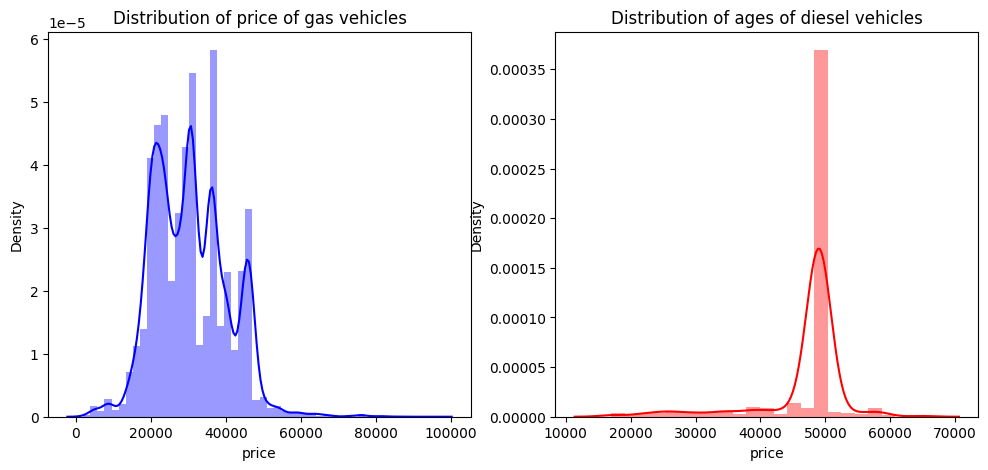

In [37]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['Fuel Type'] == 'gasoline')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df['Fuel Type'] == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

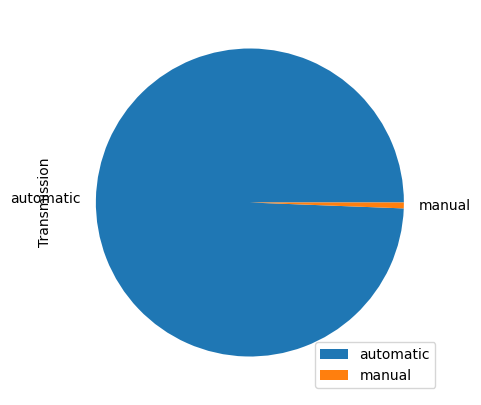

In [38]:
data=pd.DataFrame(df['Transmission'].value_counts())
plot = data.plot.pie(y='Transmission', figsize=(5, 5))

Text(0.5, 1.0, 'Distribution of ages of manual transmission')

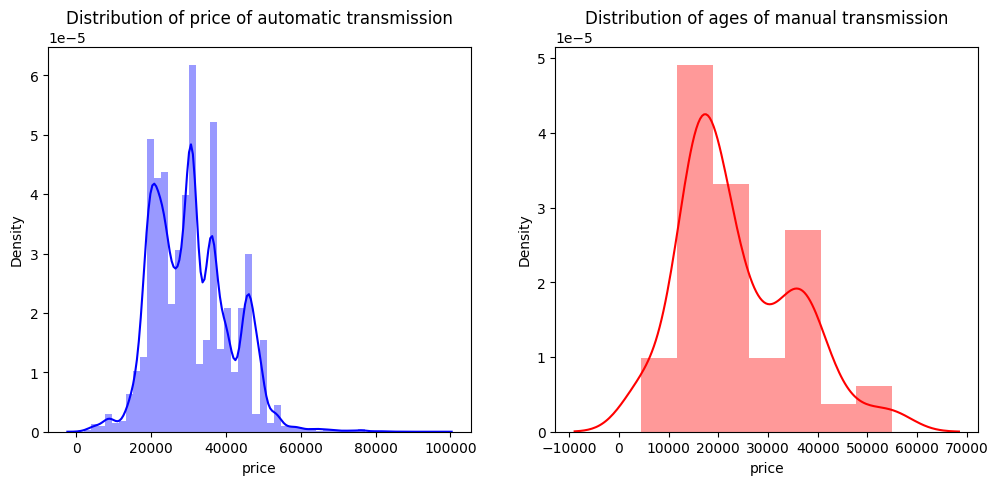

In [39]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['Transmission'] == 'automatic')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of automatic transmission')

ax=f.add_subplot(122)
sns.distplot(df[(df['Transmission'] == 'manual')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of manual transmission')

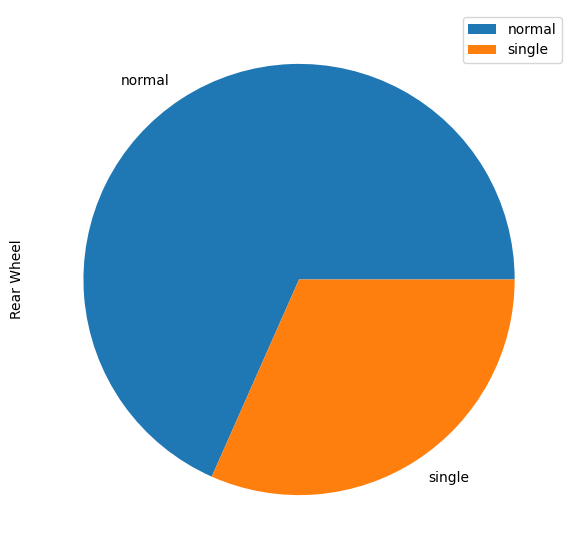

In [40]:
data=pd.DataFrame(df['Rear Wheel'].value_counts())
plot = data.plot.pie(y='Rear Wheel', figsize=(7, 7))

Text(0.5, 1.0, 'Distribution of ages of single rear wheel')

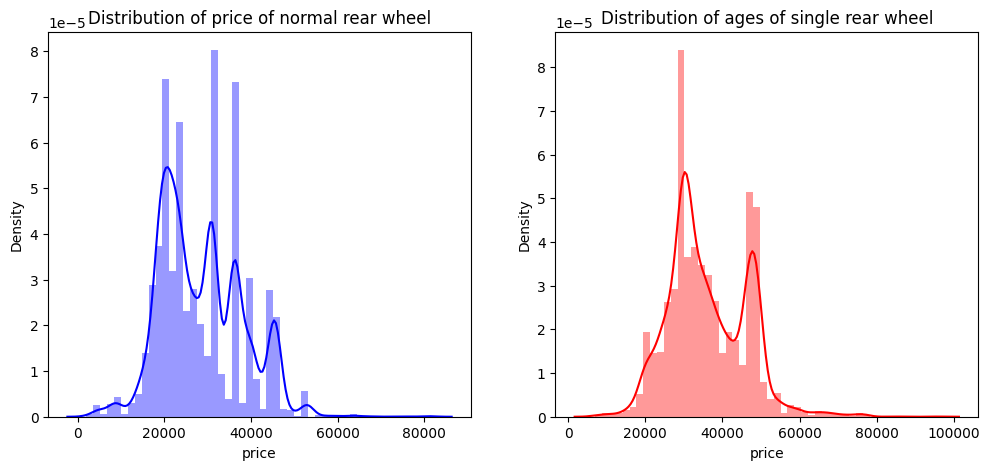

In [41]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['Rear Wheel'] == 'normal')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of normal rear wheel')

ax=f.add_subplot(122)
sns.distplot(df[(df['Rear Wheel'] == 'single')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of single rear wheel')

<Axes: xlabel='Rear Wheel', ylabel='price'>

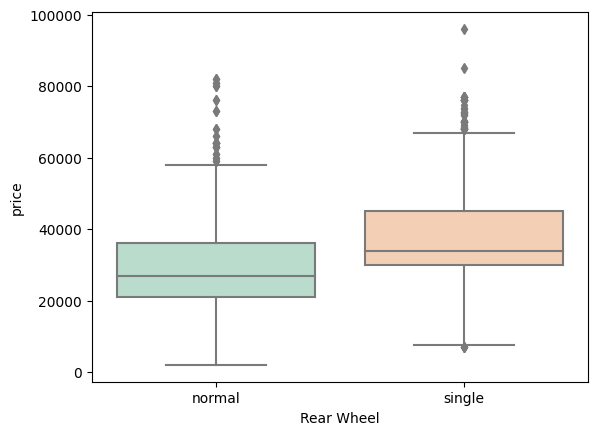

In [42]:
sns.boxplot(x = 'Rear Wheel', y = 'price', data = df,palette='Pastel2')

Text(0.5, 1.0, 'Price distribution of certified pre-owned cars')

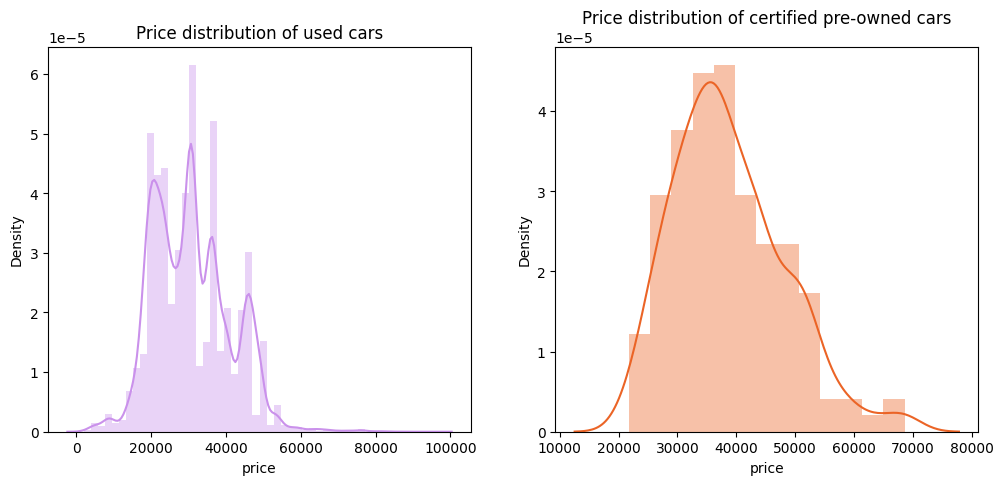

In [43]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df['Condition']== 'used')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of used cars')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df['Condition'] == 'certified pre-owned')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of certified pre-owned cars')

<Axes: xlabel='Condition', ylabel='price'>

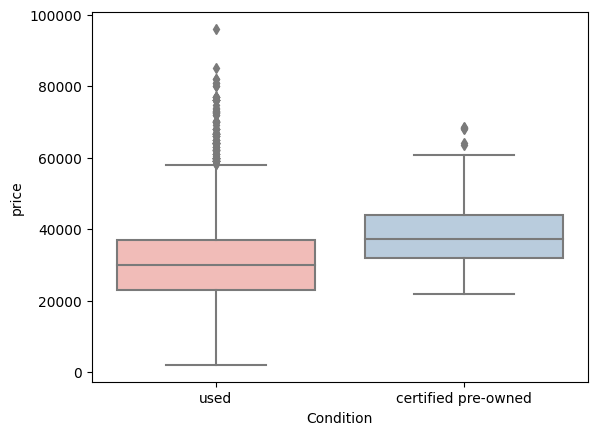

In [44]:
sns.boxplot(x = 'Condition', y = 'price', data = df,palette='Pastel1')

<Axes: xlabel='Body Style', ylabel='count'>

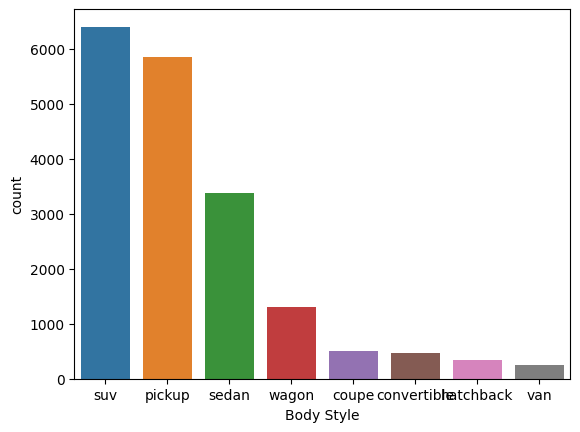

In [45]:
data=pd.DataFrame(df['Body Style'].value_counts()).reset_index().rename(columns={'index':'Body Style','Body Style':'count'})
sns.barplot(x='Body Style',y='count',data=data)

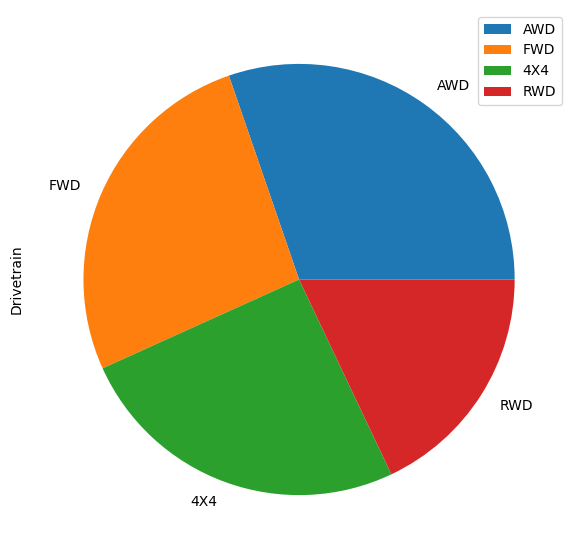

In [46]:
data=pd.DataFrame(df['Drivetrain'].value_counts())
plot = data.plot.pie(y='Drivetrain', figsize=(7, 7))

<Axes: xlabel='Drivetrain', ylabel='price'>

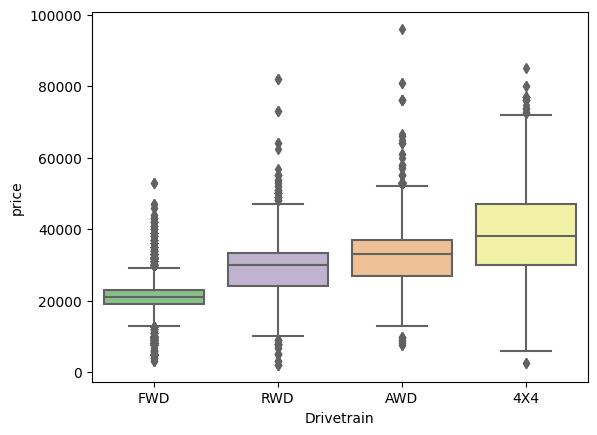

In [47]:
sns.boxplot(x = 'Drivetrain', y = 'price', data = df,palette='Accent')

In [48]:
#Creating a function for ordering the groups in a column as per their frequency
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='price', ascending = False)).index
    return orders

In [49]:
df.head()

,price,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,automatic,I-4 cyl2.0L,FWD,gasoline,Island Gray,Black,used,146773,0.655172,sedan,4.0,normal,no,normal
1,4999,automatic,Duratec 3.0L V6 24V,FWD,gasoline,Redfire Clearcoat Metallic,Shale,used,91306,0.730769,sedan,4.0,normal,no,normal
2,4998,manual,2.0L 4 Cylinder Engine,FWD,gasoline,Clear White,Stone,used,173689,0.735294,sedan,4.0,normal,no,normal
3,4999,automatic,2.7L V6 MPI DOHC 24V,RWD,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,135101,0.692308,sedan,4.0,normal,no,normal
4,4923,automatic,1.6L I4 DOHC 16V,FWD,gasoline,Blue Onyx Metallic,Charcoal,used,104749,0.789474,sedan,4.0,normal,no,normal


In [50]:
df['Transmission'] = df['Transmission'].astype('category').cat.codes + 1
df['Engine'] = df['Engine'].astype('category').cat.codes + 1
df['Drivetrain'] = df['Drivetrain'].astype('category').cat.codes + 1
df['Exterior Color'] = df['Exterior Color'].astype('category').cat.codes + 1
df['Interior Color'] = df['Interior Color'].astype('category').cat.codes + 1
df['Condition'] = df['Condition'].astype('category').cat.codes + 1
df['Body Style'] = df['Body Style'].astype('category').cat.codes + 1
df['Fuel Type'] = df['Fuel Type'].astype('category').cat.codes + 1
df['Cabin'] = df['Cabin'].astype('category').cat.codes + 1
df['Bed'] = df['Bed'].astype('category').cat.codes + 1
df['Rear Wheel'] = df['Rear Wheel'].astype('category').cat.codes + 1

In [51]:
df.dtypes

price               int64
Transmission         int8
Engine              int16
Drivetrain           int8
Fuel Type            int8
Exterior Color      int16
Interior Color      int16
Condition            int8
Mileage            object
Gas Mileage       float64
Body Style           int8
Doors             float64
Cabin                int8
Bed                  int8
Rear Wheel           int8
dtype: object

In [52]:
df.head()

,price,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,1,231,3,4,125,10,2,146773,0.655172,5,4.0,3,2,1
1,4999,1,186,3,4,188,117,2,91306,0.730769,5,4.0,3,2,1
2,4998,2,13,3,4,68,120,2,173689,0.735294,5,4.0,3,2,1
3,4999,1,55,4,4,31,58,2,135101,0.692308,5,4.0,3,2,1
4,4923,1,10,3,4,37,37,2,104749,0.789474,5,4.0,3,2,1


In [53]:
x = df[['Transmission','Engine','Drivetrain','Fuel Type','Exterior Color',
        'Interior Color','Condition','Mileage', 'Gas Mileage', 'Body Style', 'Doors', 'Cabin', 'Bed', 'Rear Wheel']].values
y = df['price'].values

print(x.shape)
print(y.shape)

(18489, 14)
(18489,)


In [54]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14791, 14)
(14791, 1)
(3698, 14)
(3698, 1)


In [68]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [69]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [70]:
lgbm = LGBMRegressor(random_state = 123 ,  num_leaves = 750 , learning_rate = 0.01, max_bin = 1200 , n_estimators = 1000)
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 14791, number of used features: 14
[LightGBM] [Info] Start training from score 0.000472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(learning_rate=0.01, max_bin=1200, n_estimators=1000,
              num_leaves=750, random_state=123)

In [71]:
xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [72]:
y_xgb = xgb.predict(x_test)
r2_score(y_test, y_xgb)

0.9537318126925106

In [73]:
rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [74]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor'],

    'score': [linear.score(x_train, y_train), knn.score(x_train, y_train),
              lgbm.score(x_train, y_train), xgb.score(x_train, y_train) , rf.score(x_train, y_train)]
    })
train_score

,model,score
0,LinearRegressor,0.572930
1,KNeighborsRegressor,0.926439
2,LGBMRegressor,0.986060
3,XGBRegressor,0.999184
4,RandomForestRegressor,0.992130


In [75]:
linear_pred = (linear.predict(x_test))
knn_pred = (knn.predict(x_test))
lgbm_pred = (lgbm.predict(x_test))
xgb_pred = (xgb.predict(x_test))
rf_pred = (rf.predict(x_test))

y_test = (y_test)

In [76]:
# Generalisation
best_model = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor'],

    'mae': [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred),
            mean_absolute_error(y_test, lgbm_pred),
            mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, rf_pred)],

    'mse': [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred),
            mean_squared_error(y_test, lgbm_pred),
            mean_squared_error(y_test, xgb_pred), mean_squared_error(y_test, rf_pred)],

    'rmse': [np.sqrt(mean_squared_error(y_test, linear_pred)),
             np.sqrt(mean_squared_error(y_test, knn_pred)),
             np.sqrt(mean_squared_error(y_test, lgbm_pred)),
             np.sqrt(mean_squared_error(y_test, xgb_pred)),
             np.sqrt(mean_squared_error(y_test, rf_pred))],
    'r2_score': [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred),
                 r2_score(y_test, lgbm_pred),
                 r2_score(y_test, xgb_pred), r2_score(y_test, rf_pred)]
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,0.512712,0.428187,0.654360,0.566502
1,KNeighborsRegressor,0.166899,0.117698,0.343071,0.880842
2,LGBMRegressor,0.112720,0.060538,0.246045,0.938711
3,XGBRegressor,0.086093,0.045701,0.213779,0.953732
4,RandomForestRegressor,0.109537,0.061637,0.248268,0.937599


In [77]:
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(xgb_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    [1.36308792]
Predict price: 1.3627583980560303


Real price:    [1.36308792]
Predict price: 1.3608967065811157


Real price:    [0.58762533]
Predict price: 0.586939811706543


Real price:    [-0.15371691]
Predict price: -0.1528475284576416


Real price:    [0.00602838]
Predict price: 0.006461522076278925


